In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

C:\Users\franc\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\franc\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [43]:
BTC = pd.read_csv(r"C:\Users\franc\OneDrive - Fundacao Getulio Vargas - FGV\Economia\Quant\Datathon\BTC_trade.csv")
ETH = pd.read_csv(r"C:\Users\franc\OneDrive - Fundacao Getulio Vargas - FGV\Economia\Quant\Datathon\ETH_trade.csv")
BNB = pd.read_csv(r"C:\Users\franc\OneDrive - Fundacao Getulio Vargas - FGV\Economia\Quant\Datathon\BNB_trade.csv")
ADA = pd.read_csv(r"C:\Users\franc\OneDrive - Fundacao Getulio Vargas - FGV\Economia\Quant\Datathon\ADA_trade.csv")
XRP = pd.read_csv(r"C:\Users\franc\OneDrive - Fundacao Getulio Vargas - FGV\Economia\Quant\Datathon\XRP_trade.csv")
SOL = pd.read_csv(r"C:\Users\franc\OneDrive - Fundacao Getulio Vargas - FGV\Economia\Quant\Datathon\SOL_trade.csv")

BTC['Daily Return'] = BTC['Daily Return']/10
ETH['Daily Return'] = ETH['Daily Return']/10
BNB['Daily Return'] = BNB['Daily Return']/10
ADA['Daily Return'] = ADA['Daily Return']/10
XRP['Daily Return'] = XRP['Daily Return']/10
SOL['Daily Return'] = SOL['Daily Return']/10

BTC['Predicted Vol'] = BTC['Predicted Vol']/100

In [14]:
print(BTC.head())

print(len(BTC))
print(len(ETH))
print(len(BNB))
print(len(ADA))
print(len(XRP))
print(len(SOL))

         Date  Daily Return  Predicted Vol
0  2022-11-08     -0.105429       0.079026
1  2022-11-09     -0.154890       0.211643
2  2022-11-10      0.102037       0.492393
3  2022-11-11     -0.031918       0.427518
4  2022-11-12     -0.013898       0.376243
743
743
513
513
513
336


In [15]:
'''
dataframes = [BTC, ETH, BNB, ADA, XRP, SOL]

# Find the dataframe with the smallest number of rows
smallest_df = min(dataframes, key=lambda df: len(df))

# Get the index of the smallest dataframe
valid_dates = smallest_df.index

# Filter all dataframes to keep only these dates
filtered_dataframes = [df.loc[valid_dates] for df in dataframes]

# Display results
for i, df in enumerate(filtered_dataframes, start=1):
    print(f"Filtered DataFrame {i}:\n{df}\n")
'''

'\ndataframes = [BTC, ETH, BNB, ADA, XRP, SOL]\n\n# Find the dataframe with the smallest number of rows\nsmallest_df = min(dataframes, key=lambda df: len(df))\n\n# Get the index of the smallest dataframe\nvalid_dates = smallest_df.index\n\n# Filter all dataframes to keep only these dates\nfiltered_dataframes = [df.loc[valid_dates] for df in dataframes]\n\n# Display results\nfor i, df in enumerate(filtered_dataframes, start=1):\n    print(f"Filtered DataFrame {i}:\n{df}\n")\n'

# Bitcoin

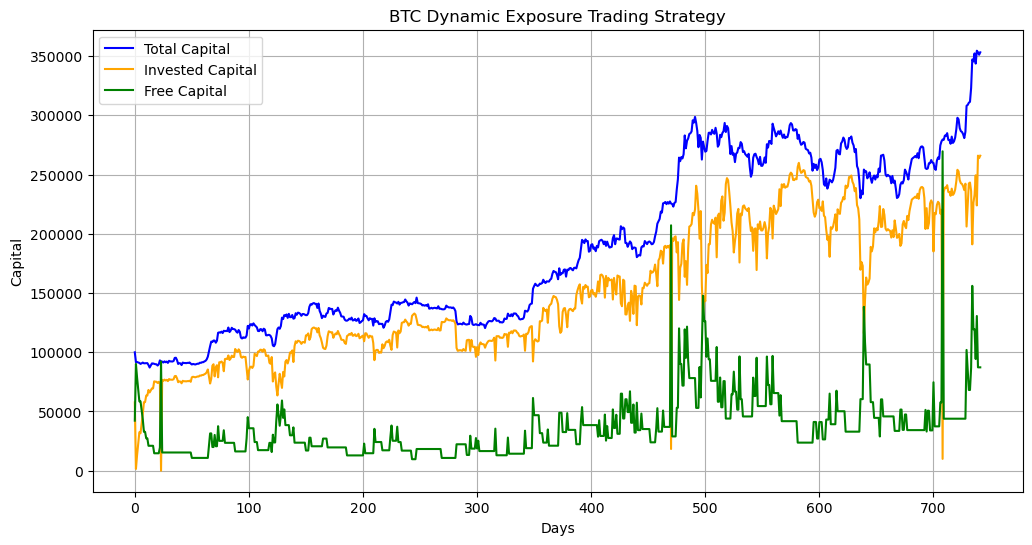

Sharpe da estrategia: 1.4947285461523898
Desvio da estrategia: 0.020272889237728922
Maximum drawdown: -0.2298260478408392
Retorno total: 253.1691674368074
Capital final: 353169.1674368074


In [38]:
# Parameters
min_delta = 0.05  # Minimum change in exposure to trigger a trade (5%)
initial_capital = 100000  # Initial total capital
transaction_cost_rate = 0.001  # 0.1% transaction cost per trade
threshold = 0.005  # Volatility threshold for dynamic exposure

# Example inputs (replace these with actual pd.Series of BTC log returns and forecasted volatility)
n_days = len(BTC['Daily Return'])
log_returns = BTC['Daily Return']  # BTC log returns
forecasted_volatility = BTC['Predicted Vol']  # Forecasted volatility

# Dynamic exposure calculation based on forecasted volatility
def calculate_exposure(volatility, threshold):
    max_exposure = 1.0
    exposure = 1 - (volatility / threshold)
    return exposure.clip(0, max_exposure)  # Exposure is between 0 and 1

# Initialize variables
exposure = calculate_exposure(forecasted_volatility, threshold)
invested_capital = 0  # Initially no capital is invested in BTC
free_capital = initial_capital  # All capital is initially free
total_capital = initial_capital
current_exposure = 0  # Initial exposure
invested_capital_history = []
free_capital_history = []
total_capital_history = []

# Trading logic with minimum delta and capital tracking
for day in range(len(log_returns)-1): #mudei aqui
    # Update invested capital with BTC returns
    invested_capital *= np.exp(log_returns.iloc[day])  # Apply log returns
    
    target_exposure = exposure.iloc[day+1] * total_capital  # Target exposure based on forecasted volatility
    if abs(target_exposure - invested_capital) / total_capital > min_delta:
        # Calculate trade amount
        trade_amount = target_exposure - invested_capital
        transaction_cost = abs(trade_amount) * transaction_cost_rate
        free_capital -= trade_amount + transaction_cost  # Update free capital
        invested_capital += trade_amount  # Update invested capital

    # Ensure total capital consistency
    total_capital = free_capital + invested_capital

    # Track capital history
    invested_capital_history.append(invested_capital)
    free_capital_history.append(free_capital)
    total_capital_history.append(total_capital)

# Convert history to pd.Series for easier analysis
invested_capital_history = pd.Series(invested_capital_history)
free_capital_history = pd.Series(free_capital_history)
total_capital_history = pd.Series(total_capital_history)

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(total_capital_history, label="Total Capital", color="blue")
plt.plot(invested_capital_history, label="Invested Capital", color="orange")
plt.plot(free_capital_history, label="Free Capital", color="green")
plt.title("BTC Dynamic Exposure Trading Strategy")
plt.xlabel("Days")
plt.ylabel("Capital")
plt.legend()
plt.grid(True)
plt.show()

returns_total_capital = total_capital_history.pct_change().dropna()
sharpe_ratio = returns_total_capital.mean() / returns_total_capital.std()*np.sqrt(252)

cumulative_max = total_capital_history.cummax()
drawdown = (total_capital_history - cumulative_max) / cumulative_max
max_drawdown = drawdown.min()

total_return = ((total_capital_history.iloc[-1] / initial_capital)-1)*100

final_capital = total_capital_history.iloc[-1]

print(f"Sharpe da estrategia: {sharpe_ratio}")
print(f"Desvio da estrategia: {returns_total_capital.std()}")
print(f"Maximum drawdown: {max_drawdown}")
print(f"Retorno total: {total_return}")
print(f"Capital final: {final_capital}")

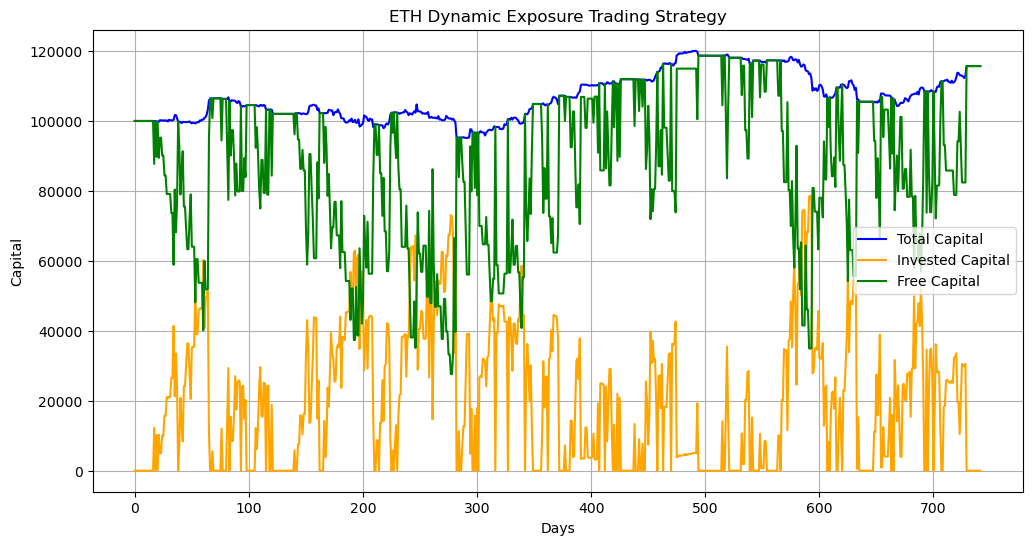

Sharpe da estrategia: 0.6101955607141412
Desvio da estrategia: 0.005514095156264729
Maximum drawdown: -0.13178951920819695
Retorno total: 15.693983275515965
Capital final: 115693.98327551596


In [45]:
# Parameters
min_delta = 0.05  # Minimum change in exposure to trigger a trade (5%)
initial_capital = 100000  # Initial total capital
transaction_cost_rate = 0.001  # 0.1% transaction cost per trade
threshold = 0.1  # Volatility threshold for dynamic exposure

# Example inputs (replace these with actual pd.Series of BTC log returns and forecasted volatility)
n_days = len(ETH['Daily Return'])
log_returns = ETH['Daily Return']  # BTC log returns
forecasted_volatility = ETH['Predicted Vol']  # Forecasted volatility

# Dynamic exposure calculation based on forecasted volatility
def calculate_exposure(volatility, threshold):
    max_exposure = 1.0
    exposure = 1 - (volatility / threshold)
    return exposure.clip(0, max_exposure)  # Exposure is between 0 and 1

# Initialize variables
exposure = calculate_exposure(forecasted_volatility, threshold)
invested_capital = 0  # Initially no capital is invested in BTC
free_capital = initial_capital  # All capital is initially free
total_capital = initial_capital
current_exposure = 0  # Initial exposure
invested_capital_history = []
free_capital_history = []
total_capital_history = []

# Trading logic with minimum delta and capital tracking
for day in range(len(log_returns)-1): #mudei aqui
    # Update invested capital with BTC returns
    invested_capital *= np.exp(log_returns.iloc[day])  # Apply log returns
    
    target_exposure = exposure.iloc[day+1] * total_capital  # Target exposure based on forecasted volatility
    if abs(target_exposure - invested_capital) / total_capital > min_delta:
        # Calculate trade amount
        trade_amount = target_exposure - invested_capital
        transaction_cost = abs(trade_amount) * transaction_cost_rate
        free_capital -= trade_amount + transaction_cost  # Update free capital
        invested_capital += trade_amount  # Update invested capital
    
    # Ensure total capital consistency
    total_capital = free_capital + invested_capital

    # Track capital history
    invested_capital_history.append(invested_capital)
    free_capital_history.append(free_capital)
    total_capital_history.append(total_capital)

# Convert history to pd.Series for easier analysis
invested_capital_history = pd.Series(invested_capital_history)
free_capital_history = pd.Series(free_capital_history)
total_capital_history = pd.Series(total_capital_history)

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(total_capital_history, label="Total Capital", color="blue")
plt.plot(invested_capital_history, label="Invested Capital", color="orange")
plt.plot(free_capital_history, label="Free Capital", color="green")
plt.title("ETH Dynamic Exposure Trading Strategy")
plt.xlabel("Days")
plt.ylabel("Capital")
plt.legend()
plt.grid(True)
plt.show()

returns_total_capital = total_capital_history.pct_change().dropna()
sharpe_ratio = returns_total_capital.mean() / returns_total_capital.std()*np.sqrt(252)

cumulative_max = total_capital_history.cummax()
drawdown = (total_capital_history - cumulative_max) / cumulative_max
max_drawdown = drawdown.min()

total_return = ((total_capital_history.iloc[-1] / initial_capital)-1)*100

final_capital = total_capital_history.iloc[-1]

print(f"Sharpe da estrategia: {sharpe_ratio}")
print(f"Desvio da estrategia: {returns_total_capital.std()}")
print(f"Maximum drawdown: {max_drawdown}")
print(f"Retorno total: {total_return}")
print(f"Capital final: {final_capital}")

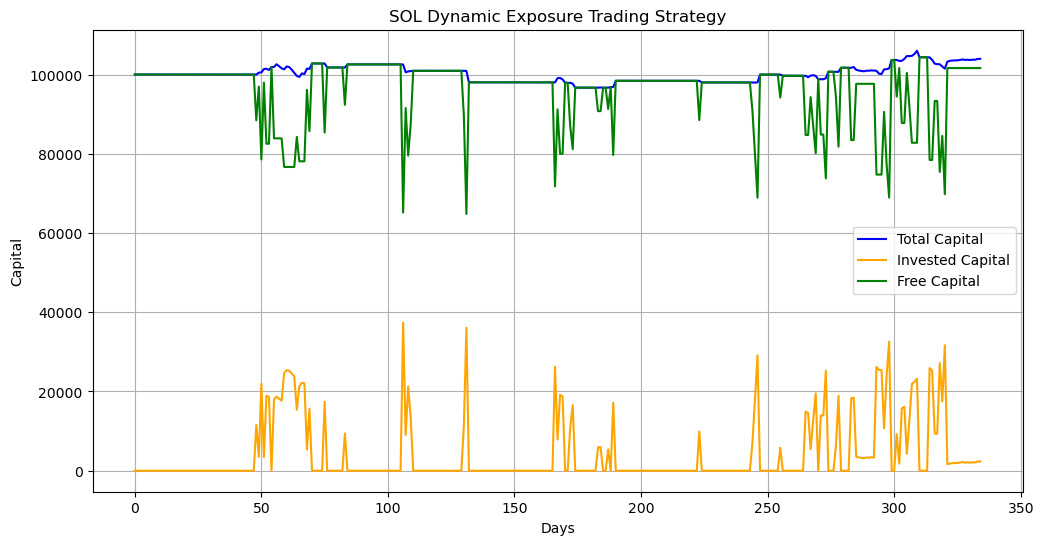

Sharpe da estrategia: 0.49090401473831474
Desvio da estrategia: 0.004018441249857635
Maximum drawdown: -0.059477568723782126
Retorno total: 3.957803051605424
Capital final: 103957.80305160543


In [51]:
# Parameters
min_delta = 0.05  # Minimum change in exposure to trigger a trade (5%)
initial_capital = 100000  # Initial total capital
transaction_cost_rate = 0.001  # 0.1% transaction cost per trade
threshold = 0.2  # Volatility threshold for dynamic exposure

# Example inputs (replace these with actual pd.Series of BTC log returns and forecasted volatility)
n_days = len(SOL['Daily Return'])
log_returns = SOL['Daily Return']  # BTC log returns
forecasted_volatility = SOL['Predicted Vol']  # Forecasted volatility

# Dynamic exposure calculation based on forecasted volatility
def calculate_exposure(volatility, threshold):
    max_exposure = 1.0
    exposure = 1 - (volatility / threshold)
    return exposure.clip(0, max_exposure)  # Exposure is between 0 and 1

# Initialize variables
exposure = calculate_exposure(forecasted_volatility, threshold)
invested_capital = 0  # Initially no capital is invested in BTC
free_capital = initial_capital  # All capital is initially free
total_capital = initial_capital
current_exposure = 0  # Initial exposure
invested_capital_history = []
free_capital_history = []
total_capital_history = []

# Trading logic with minimum delta and capital tracking
for day in range(len(log_returns)-1): #mudei aqui
    # Update invested capital with BTC returns
    invested_capital *= np.exp(log_returns.iloc[day])  # Apply log returns
    
    target_exposure = exposure.iloc[day+1] * total_capital  # Target exposure based on forecasted volatility
    if abs(target_exposure - invested_capital) / total_capital > min_delta:
        # Calculate trade amount
        trade_amount = target_exposure - invested_capital
        transaction_cost = abs(trade_amount) * transaction_cost_rate
        free_capital -= trade_amount + transaction_cost  # Update free capital
        invested_capital += trade_amount  # Update invested capital
    
    # Ensure total capital consistency
    total_capital = free_capital + invested_capital

    # Track capital history
    invested_capital_history.append(invested_capital)
    free_capital_history.append(free_capital)
    total_capital_history.append(total_capital)

# Convert history to pd.Series for easier analysis
invested_capital_history = pd.Series(invested_capital_history)
free_capital_history = pd.Series(free_capital_history)
total_capital_history = pd.Series(total_capital_history)

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(total_capital_history, label="Total Capital", color="blue")
plt.plot(invested_capital_history, label="Invested Capital", color="orange")
plt.plot(free_capital_history, label="Free Capital", color="green")
plt.title("SOL Dynamic Exposure Trading Strategy")
plt.xlabel("Days")
plt.ylabel("Capital")
plt.legend()
plt.grid(True)
plt.show()

returns_total_capital = total_capital_history.pct_change().dropna()
sharpe_ratio = returns_total_capital.mean() / returns_total_capital.std()*np.sqrt(252)

cumulative_max = total_capital_history.cummax()
drawdown = (total_capital_history - cumulative_max) / cumulative_max
max_drawdown = drawdown.min()

total_return = ((total_capital_history.iloc[-1] / initial_capital)-1)*100

final_capital = total_capital_history.iloc[-1]

print(f"Sharpe da estrategia: {sharpe_ratio}")
print(f"Desvio da estrategia: {returns_total_capital.std()}")
print(f"Maximum drawdown: {max_drawdown}")
print(f"Retorno total: {total_return}")
print(f"Capital final: {final_capital}")

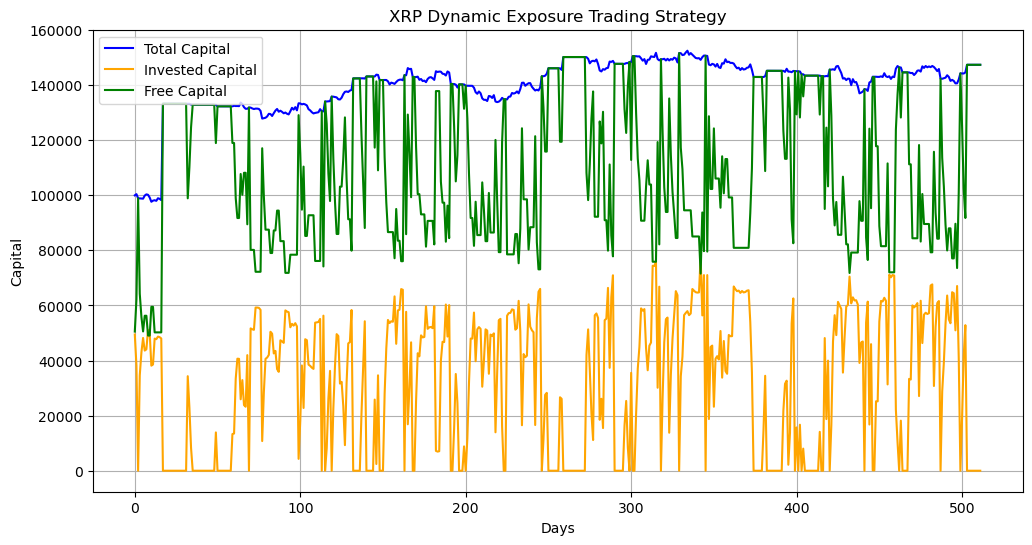

0.8195235221400357
-0.1014860182830071
47.348012281246184
147348.0122812462


In [52]:
# Parameters
min_delta = 0.05  # Minimum change in exposure to trigger a trade (5%)
initial_capital = 100000  # Initial total capital
transaction_cost_rate = 0.001  # 0.1% transaction cost per trade
threshold = 0.2  # Volatility threshold for dynamic exposure

# Example inputs (replace these with actual pd.Series of BTC log returns and forecasted volatility)
n_days = len(XRP['Daily Return'])
log_returns = XRP['Daily Return']  # BTC log returns
forecasted_volatility = XRP['Predicted Vol']  # Forecasted volatility

# Dynamic exposure calculation based on forecasted volatility
def calculate_exposure(volatility, threshold):
    max_exposure = 1.0
    exposure = 1 - (volatility / threshold)
    return exposure.clip(0, max_exposure)  # Exposure is between 0 and 1

# Initialize variables
exposure = calculate_exposure(forecasted_volatility, threshold)
invested_capital = 0  # Initially no capital is invested in BTC
free_capital = initial_capital  # All capital is initially free
total_capital = initial_capital
current_exposure = 0  # Initial exposure
invested_capital_history = []
free_capital_history = []
total_capital_history = []

# Trading logic with minimum delta and capital tracking
for day in range(len(log_returns)-1): #mudei aqui
    # Update invested capital with BTC returns
    invested_capital *= np.exp(log_returns.iloc[day])  # Apply log returns
    
    target_exposure = exposure.iloc[day+1] * total_capital  # Target exposure based on forecasted volatility
    if abs(target_exposure - invested_capital) / total_capital > min_delta:
        # Calculate trade amount
        trade_amount = target_exposure - invested_capital
        transaction_cost = abs(trade_amount) * transaction_cost_rate
        free_capital -= trade_amount + transaction_cost  # Update free capital
        invested_capital += trade_amount  # Update invested capital
    
    # Ensure total capital consistency
    total_capital = free_capital + invested_capital

    # Track capital history
    invested_capital_history.append(invested_capital)
    free_capital_history.append(free_capital)
    total_capital_history.append(total_capital)

# Convert history to pd.Series for easier analysis
invested_capital_history = pd.Series(invested_capital_history)
free_capital_history = pd.Series(free_capital_history)
total_capital_history = pd.Series(total_capital_history)

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(total_capital_history, label="Total Capital", color="blue")
plt.plot(invested_capital_history, label="Invested Capital", color="orange")
plt.plot(free_capital_history, label="Free Capital", color="green")
plt.title("XRP Dynamic Exposure Trading Strategy")
plt.xlabel("Days")
plt.ylabel("Capital")
plt.legend()
plt.grid(True)
plt.show()

returns_total_capital = total_capital_history.pct_change().dropna()
sharpe_ratio = returns_total_capital.mean() / returns_total_capital.std()*np.sqrt(252)

cumulative_max = total_capital_history.cummax()
drawdown = (total_capital_history - cumulative_max) / cumulative_max
max_drawdown = drawdown.min()

total_return = ((total_capital_history.iloc[-1] / initial_capital)-1)*100

final_capital = total_capital_history.iloc[-1]

print(sharpe_ratio)
print(max_drawdown)
print(total_return)
print(final_capital)

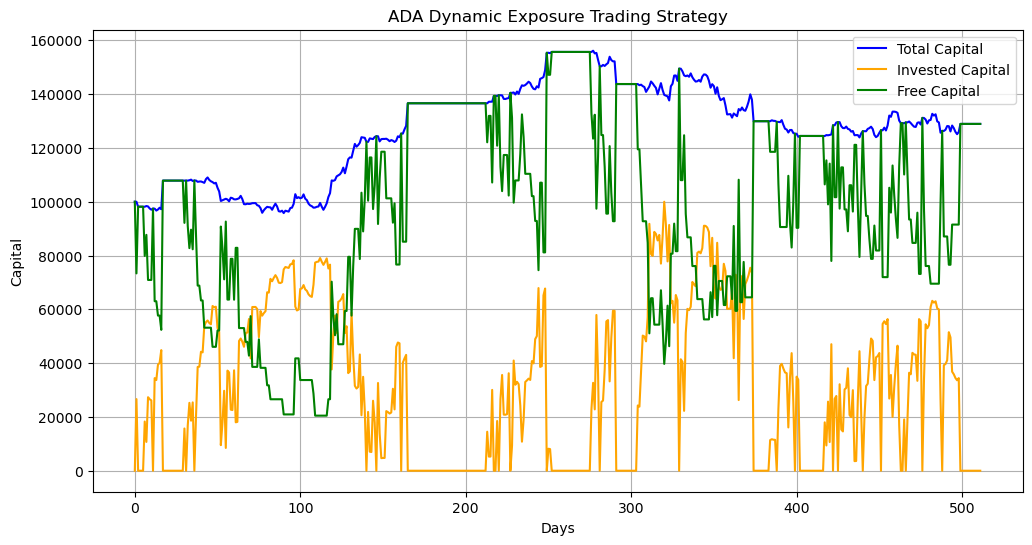

Sharpe da estrategia: 0.8002493551446014
Desvio da estrategia: 0.01105577062154255
Maximum drawdown: -0.20642551668687548
Retorno total: 28.919828572091365
Capital final: 128919.82857209137


In [53]:
# Parameters
min_delta = 0.05  # Minimum change in exposure to trigger a trade (5%)
initial_capital = 100000  # Initial total capital
transaction_cost_rate = 0.001  # 0.1% transaction cost per trade
threshold = 0.2  # Volatility threshold for dynamic exposure

# Example inputs (replace these with actual pd.Series of BTC log returns and forecasted volatility)
n_days = len(ADA['Daily Return'])
log_returns = ADA['Daily Return']  # BTC log returns
forecasted_volatility = ADA['Predicted Vol']  # Forecasted volatility

# Dynamic exposure calculation based on forecasted volatility
def calculate_exposure(volatility, threshold):
    max_exposure = 1.0
    exposure = 1 - (volatility / threshold)
    return exposure.clip(0, max_exposure)  # Exposure is between 0 and 1

# Initialize variables
exposure = calculate_exposure(forecasted_volatility, threshold)
invested_capital = 0  # Initially no capital is invested in BTC
free_capital = initial_capital  # All capital is initially free
total_capital = initial_capital
current_exposure = 0  # Initial exposure
invested_capital_history = []
free_capital_history = []
total_capital_history = []

# Trading logic with minimum delta and capital tracking
for day in range(len(log_returns)-1): #mudei aqui
    # Update invested capital with BTC returns
    invested_capital *= np.exp(log_returns.iloc[day])  # Apply log returns
    
    target_exposure = exposure.iloc[day+1] * total_capital  # Target exposure based on forecasted volatility
    if abs(target_exposure - invested_capital) / total_capital > min_delta:
        # Calculate trade amount
        trade_amount = target_exposure - invested_capital
        transaction_cost = abs(trade_amount) * transaction_cost_rate
        free_capital -= trade_amount + transaction_cost  # Update free capital
        invested_capital += trade_amount  # Update invested capital
    
    # Ensure total capital consistency
    total_capital = free_capital + invested_capital

    # Track capital history
    invested_capital_history.append(invested_capital)
    free_capital_history.append(free_capital)
    total_capital_history.append(total_capital)

# Convert history to pd.Series for easier analysis
invested_capital_history = pd.Series(invested_capital_history)
free_capital_history = pd.Series(free_capital_history)
total_capital_history = pd.Series(total_capital_history)

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(total_capital_history, label="Total Capital", color="blue")
plt.plot(invested_capital_history, label="Invested Capital", color="orange")
plt.plot(free_capital_history, label="Free Capital", color="green")
plt.title("ADA Dynamic Exposure Trading Strategy")
plt.xlabel("Days")
plt.ylabel("Capital")
plt.legend()
plt.grid(True)
plt.show()

returns_total_capital = total_capital_history.pct_change().dropna()
sharpe_ratio = returns_total_capital.mean() / returns_total_capital.std()*np.sqrt(252)

cumulative_max = total_capital_history.cummax()
drawdown = (total_capital_history - cumulative_max) / cumulative_max
max_drawdown = drawdown.min()

total_return = ((total_capital_history.iloc[-1] / initial_capital)-1)*100

final_capital = total_capital_history.iloc[-1]

print(f"Sharpe da estrategia: {sharpe_ratio}")
print(f"Desvio da estrategia: {returns_total_capital.std()}")
print(f"Maximum drawdown: {max_drawdown}")
print(f"Retorno total: {total_return}")
print(f"Capital final: {final_capital}")

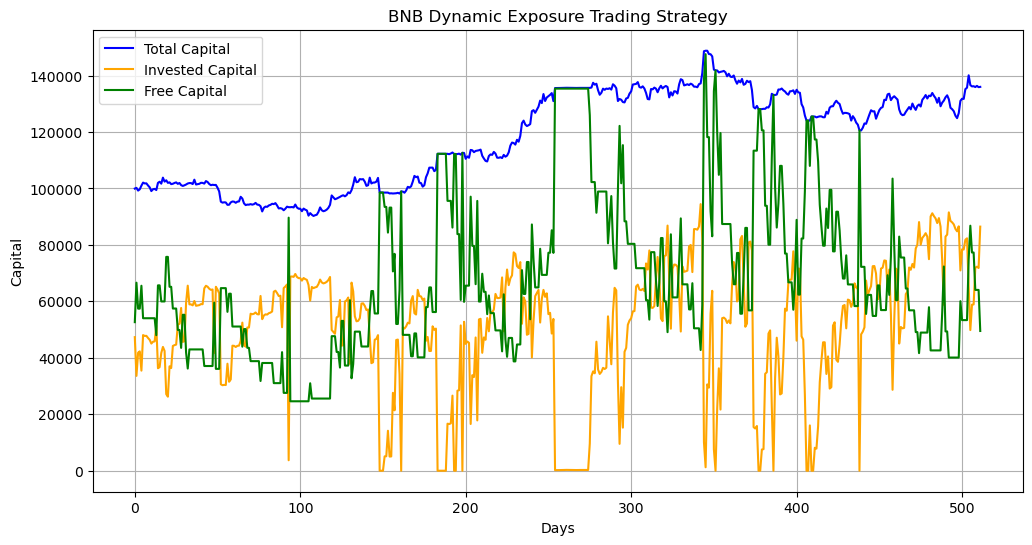

Sharpe da estrategia: 0.9485787665555926
Desvio da estrategia: 0.011111980565553186
Maximum drawdown: -0.1898332445616869
Retorno total: 35.97915295910737
Capital final: 135979.15295910736


In [54]:
# Parameters
min_delta = 0.05  # Minimum change in exposure to trigger a trade (5%)
initial_capital = 100000  # Initial total capital
transaction_cost_rate = 0.001  # 0.1% transaction cost per trade
threshold = 0.2  # Volatility threshold for dynamic exposure

# Example inputs (replace these with actual pd.Series of BTC log returns and forecasted volatility)
n_days = len(BNB['Daily Return'])
log_returns = BNB['Daily Return']  # BTC log returns
forecasted_volatility = BNB['Predicted Vol']  # Forecasted volatility

# Dynamic exposure calculation based on forecasted volatility
def calculate_exposure(volatility, threshold):
    max_exposure = 1.0
    exposure = 1 - (volatility / threshold)
    return exposure.clip(0, max_exposure)  # Exposure is between 0 and 1

# Initialize variables
exposure = calculate_exposure(forecasted_volatility, threshold)
invested_capital = 0  # Initially no capital is invested in BTC
free_capital = initial_capital  # All capital is initially free
total_capital = initial_capital
current_exposure = 0  # Initial exposure
invested_capital_history = []
free_capital_history = []
total_capital_history = []

# Trading logic with minimum delta and capital tracking
for day in range(len(log_returns)-1): #mudei aqui
    # Update invested capital with BTC returns
    invested_capital *= np.exp(log_returns.iloc[day])  # Apply log returns
    
    target_exposure = exposure.iloc[day+1] * total_capital  # Target exposure based on forecasted volatility
    if abs(target_exposure - invested_capital) / total_capital > min_delta:
        # Calculate trade amount
        trade_amount = target_exposure - invested_capital
        transaction_cost = abs(trade_amount) * transaction_cost_rate
        free_capital -= trade_amount + transaction_cost  # Update free capital
        invested_capital += trade_amount  # Update invested capital
    
    # Ensure total capital consistency
    total_capital = free_capital + invested_capital

    # Track capital history
    invested_capital_history.append(invested_capital)
    free_capital_history.append(free_capital)
    total_capital_history.append(total_capital)

# Convert history to pd.Series for easier analysis
invested_capital_history = pd.Series(invested_capital_history)
free_capital_history = pd.Series(free_capital_history)
total_capital_history = pd.Series(total_capital_history)

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(total_capital_history, label="Total Capital", color="blue")
plt.plot(invested_capital_history, label="Invested Capital", color="orange")
plt.plot(free_capital_history, label="Free Capital", color="green")
plt.title("BNB Dynamic Exposure Trading Strategy")
plt.xlabel("Days")
plt.ylabel("Capital")
plt.legend()
plt.grid(True)
plt.show()

returns_total_capital = total_capital_history.pct_change().dropna()
sharpe_ratio = returns_total_capital.mean() / returns_total_capital.std()*np.sqrt(252)

cumulative_max = total_capital_history.cummax()
drawdown = (total_capital_history - cumulative_max) / cumulative_max
max_drawdown = drawdown.min()

total_return = ((total_capital_history.iloc[-1] / initial_capital)-1)*100

final_capital = total_capital_history.iloc[-1]

print(f"Sharpe da estrategia: {sharpe_ratio}")
print(f"Desvio da estrategia: {returns_total_capital.std()}")
print(f"Maximum drawdown: {max_drawdown}")
print(f"Retorno total: {total_return}")
print(f"Capital final: {final_capital}")